In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
quality_cancel_func = lambda pre, post: (np.mean(pre) - np.mean(post))

def load(test_var):
    with open('../results/robustness_exp_%s.pkl' % test_var, 'rb') as f:
        df = pickle.load(f)
    df = pd.DataFrame(df)
    aux = zip(df['TS_similarity_pre'], df['TS_similarity_post'])
    df['quality_cancel'] = [quality_cancel_func(i, j) for i,j in aux]
    return df

In [3]:
df_cW = load('cW')
df_cW.loc[:,'cW'] *= 100
df_thr = load('plasticity_th')
df_thE = load('thE')

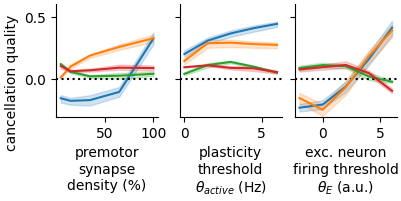

In [4]:
fig, ax = plt.subplots(1, 3, sharey='all', figsize=(4, 2))
hue_order = ['FF', 'HVC2E', 'E2E', 'E2I2E']
sns.lineplot(data=df_cW, x='cW', y='quality_cancel', 
             hue='model', hue_order=hue_order, legend=False, ax=ax[0])
for a in ax:
    a.axhline(0, c='k', ls=':')
ax[0].set(ylabel='cancellation quality'+' '*10, xlabel='premotor\nsynapse\ndensity (%)', 
          yticks=[0, 0.5], ylim=[-0.3, 0.6])

sns.lineplot(data=df_thr, x='plasticity_th', y='quality_cancel', 
             hue='model', hue_order=hue_order, legend=False, ax=ax[1])
ax[1].set(xlabel='plasticity\nthreshold\n$\\theta_{active}$ (Hz)')

sns.lineplot(data=df_thE, x='thE', y='quality_cancel', 
             hue='model', hue_order=hue_order, legend=False, ax=ax[2])
ax[2].set(xlabel='exc. neuron\nfiring threshold\n$\\theta_E$ (a.u.)')
fig.savefig('../svg/quality_cancel_realistic_input.svg')